# 2

## 2.1

In [ ]:
import nltk
from nltk.parse import stanford
from nltk.tree import ParentedTree

# set the paths to the Stanford parser and model jars
parser_path = 'F:/arshad/Libs/stanford-parser-full-2013-06-20/stanford-parser-full-2013-06-20/stanford-parser.jar'
model_path = 'F:/arshad/Libs/stanford-parser-full-2013-06-20/stanford-parser-full-2013-06-20/stanford-parser-3.2.0-models.jar'

# initialize the parser with the jar paths
parser = stanford.StanfordParser(path_to_jar=parser_path, path_to_models_jar=model_path)

sentences = ['Do androids dream of electric sheep?',
             'How many androids escaped this time?',
             'Will have difficulty understanding how you happened to let us void your testing apparatus before the test began.',
             'This time was different.',
             'This has happened before.']

for sentence in sentences:

    parsed_sentence = list(parser.raw_parse(sentence))[0]

    is_question = (parsed_sentence[0].label() == 'SBARQ' or parsed_sentence[0].label() == 'SQ')

    print('Sentence:', sentence)
    print('Is a question:', is_question)

    tree = ParentedTree.convert(parsed_sentence)
    tree.pretty_print()

    print('\n')

C:\Users\BiG\AppData\Local\Temp\ipykernel_12260\3967323798.py:10: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = stanford.StanfordParser(path_to_jar=stanford_parser_jar, path_to_models_jar=stanford_model_jar)


Sentence: Do androids dream of electric sheep?
Is question: True
                   ROOT                           
                    |                              
                    SQ                            
  __________________|___________________________   
 |     |                 VP                     | 
 |     |        _________|_____                 |  
 |     |       |               PP               | 
 |     |       |     __________|______          |  
 |     NP      |    |                 NP        | 
 |     |       |    |           ______|____     |  
VBP   NNS      VB   IN         JJ          NN   . 
 |     |       |    |          |           |    |  
 Do androids dream  of      electric     sheep  ? 



Sentence: How many androids escaped this time?
Is question: True
                           ROOT                       
                            |                          
                          SBARQ                       
       _____________________|___

## 2.2.1

In [3]:
!pip install portalocker>=2.0.0

import random
import pandas as pd
from torchtext.datasets import IMDB

In [4]:
#Get IMDB Data

In [5]:
train = IMDB(split='train')
test = IMDB(split='test')

train_data = list(train)
test_data = list(test)

# Randomly remove most of the dataset
random.shuffle(train_data)
random.shuffle(test_data)

half_train_data = train_data[:500]
half_test_data = test_data[:500]

label=[]
comment=[]

for l, line in half_train_data:
    label.append(l)
    comment.append(line)

da = {'comment': comment, 'label': label}

# Convert dictionary to DataFrame
df = pd.DataFrame(da)

# Print the DataFrame
print(df)

                                               comment  label
0    Strange... I like all this movie crew and dark...      1
1    This is the absolutely worst piece of crap I'v...      1
2    Greetings again from the darkness. Much antici...      2
3    I thought this had the right blend of characte...      2
4    So what's the big fuss out of making an INDIAN...      1
..                                                 ...    ...
495  "What the Bleep Do We Know!?" was one of the w...      1
496  Surprisingly enough does movie does have some ...      1
497  I find myself comparing all stand-up acts to t...      2
498  Trying to compare or represent this "swill" as...      1
499  The most bizarre of the cinematic sub-genres i...      2

[500 rows x 2 columns]


## 2.2.2

In [7]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Load the dataset
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing
def preprocessed_text(text):

    text = text.lower()
    text = re.sub('[^\w\s]', '', text)
    text = re.sub('<.*?>', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]


    return filtered_tokens

df['comment'] = df['comment'].apply(preprocessed_text)
all_tokens = [token for comment in df['comment'] for token in comment]
word_counts = Counter(all_tokens)
unique_words = set(word for word, count in word_counts.items() if count == 1)
df['comment'] = df['comment'].apply(lambda x: [token for token in x if token not in unique_words])
df['comment'] = df['comment'].apply(lambda x: ' '.join(x))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


با حذف واژگانی که تنها در یک نظر وجود دارند، می توان از ابتدا از نظراتی که احتمالاً بی ارتباط با برچسب های داده شده هستند، جلوگیری کرد. همچنین، با حذف واژگان کم تکرار، می توان از تأثیرات نویزی که ممکن است در مجموعه داده وجود داشته باشد جلوگیری کرد. حذف کردن واژگانی که تنها در یک نظر اتفاق افتاده اند می تواند در پروسه دسته بندی خوب عمل کند.

به عنوان مثال، در مجموعه داده IMDb، واژه¬ای مانند unwatchable ممکن است تنها در چند نظر وجود داشته باشند و احتمالاً به نظر منفی مرتبط است. با حذف چنین واژگانی، می توان دقت دسته بندی را افزایش داد. با این حال، باید توجه کنیم که حذف واژگانی که تنها در یک نظر وجود دارند، ممکن است باعث از دست رفتن اطلاعات مفید نیز شود، بنابراین شاید بهتر باشد این موضوع را در فرآیند برنامه-نویسی با انجام آزمایش مورد تحلیل قرار دهیم.


## 2.2.3

In [8]:
#In these following codes in this part I just give a code to how each representation of imdb data can be coded.

In [9]:
#One-hot embedeing

In [10]:
#bag of words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
comments = df['comment'].tolist()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Fit and transform the comments using one-hot encoding
one_hot_vectors = vectorizer.fit_transform(comments)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.vocabulary_.keys()
BOW_vectors=one_hot_vectors.toarray()

In [12]:
#word2vec

In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import nltk

# Load the dataset
nltk.download('stopwords')
nltk.download('punkt')

# Train a word2vec model on the preprocessed text data
corpus = [comment.split() for comment in df['comment']]
model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=2, sg=1)

# Get the word2vec vectors for each word in the vocabulary
vocabulary = set(model.wv.index_to_key)
word2vec_vectors = np.zeros((len(vocabulary), model.vector_size))
for i, word in enumerate(vocabulary):
    word2vec_vectors[i] = model.wv[word]

# Print the resulting word2vec vectors and vocabulary
print("Word2vec vectors:")
print(word2vec_vectors)
print("\nVocabulary:")
print(list(vocabulary))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2vec vectors:
[[-0.11122198  0.04260522 -0.04178689 ... -0.17044525 -0.08384704
   0.01705495]
 [-0.10569617  0.05535731 -0.04525294 ... -0.17734204 -0.07920056
   0.01709625]
 [-0.10486294  0.04701575 -0.0357152  ... -0.17195426 -0.08543771
   0.01894132]
 ...
 [-0.06391099  0.03480154 -0.02722567 ... -0.10449499 -0.04521882
   0.00549152]
 [-0.06163101  0.02434036 -0.0202664  ... -0.11587711 -0.06019731
   0.01593769]
 [-0.06149013  0.01693654 -0.01849217 ... -0.10272383 -0.04375561
   0.01288714]]

Vocabulary:
['vanilla', 'relationships', 'chant', 'overbearing', 'lacks', 'struck', 'cope', 'moon', 'ignorance', 'fortune', 'airing', 'slowly', 'unknown', 'berlin', 'asimovs', 'earns', 'intercourse', 'spooky', 'booker', 'bonds', 'decades', 'ed', 'geeky', 'soundtrack', 'prostitute', 'avoided', 'bicycle', 'seventies', 'fail', 'snack', 'intelligence', 'seventh', 'addict', 'courtroom', 'productions', 'sleepaway', 'mechanical', 'naked', 'humanity', 'mine', 'excuse', '2007', 'directing', 't

In [14]:
#2.2.4.

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_num = 7
kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(BOW_vectors)
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


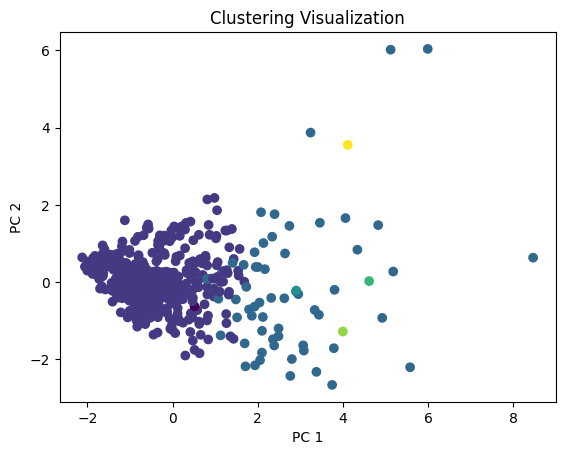

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_clusters(vectors, cluster_num):
    # Perform clustering
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans.fit(vectors)
    cluster_labels = kmeans.labels_

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(vectors)

    # Plot the clusters
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('Clustering Visualization')
    plt.show()

# Example usage
cluster_num = 7
vectors = BOW_vectors
visualize_clusters(vectors, cluster_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

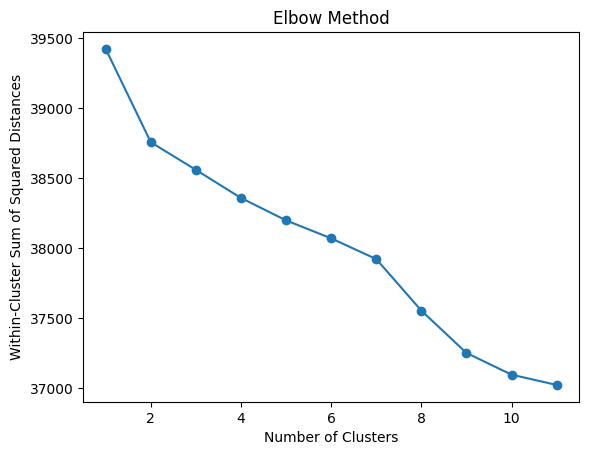

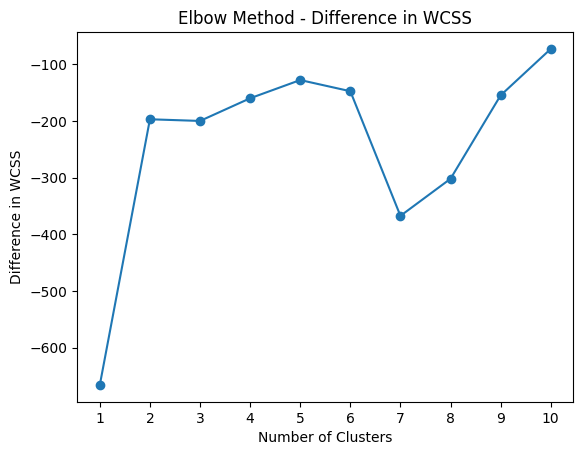

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

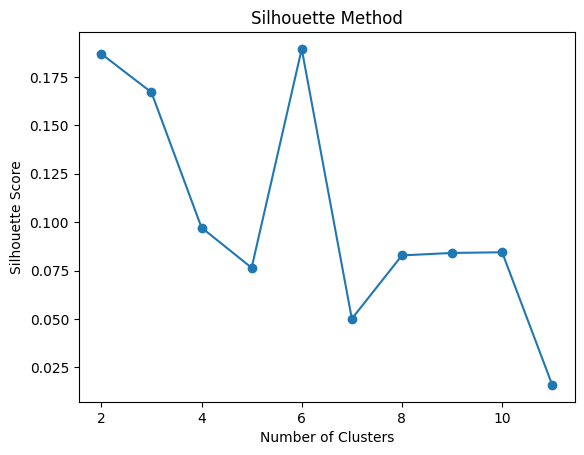

Best number of clusters: 6


In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a function to calculate the sum of squared distances of samples to their closest cluster center
def calculate_wcss(vectors, cluster_num):
    kmeans = KMeans(n_clusters=cluster_num, random_state=0)
    kmeans.fit(vectors)
    return kmeans.inertia_

# Calculate the within-cluster sum of squared distances for cluster numbers 1 to 11
wcss_values = [calculate_wcss(BOW_vectors, i) for i in range(1, 12)]

# Plot the within-cluster sum of squared distances versus the number of clusters
plt.plot(range(1, 12), wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Determine the best number of clusters using the elbow method
diff = np.diff(wcss_values)
plt.plot(range(1, 11), diff, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Difference in WCSS')
plt.title('Elbow Method - Difference in WCSS')
plt.show()

# Calculate the silhouette score for cluster numbers 2 to 11
silhouette_scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(BOW_vectors)
    silhouette_scores.append(silhouette_score(BOW_vectors, cluster_labels))

# Plot the silhouette score versus the number of clusters
plt.plot(range(2, 12), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Determine the best number of clusters using the silhouette method
best_cluster_num = np.argmax(silhouette_scores) + 2
print(f"Best number of clusters: {best_cluster_num}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


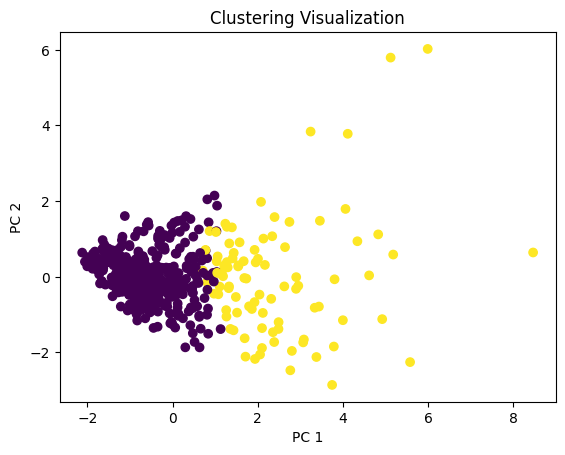

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_clusters(vectors, cluster_num):
    # Perform clustering
    kmeans = KMeans(n_clusters=cluster_num)
    kmeans.fit(vectors)
    cluster_labels = kmeans.labels_

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(vectors)

    # Plot the clusters
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('Clustering Visualization')
    plt.show()

# Example usage
cluster_num = 2
vectors = BOW_vectors
visualize_clusters(vectors, cluster_num)

In [19]:
import numpy as np
import random

def select_data_uniformly(data, cluster_labels, min_cluster_size):
    # Group data points by cluster label
    cluster_data = {}
    for i, label in enumerate(cluster_labels):
        if label not in cluster_data:
            cluster_data[label] = []
        cluster_data[label].append(data[i])

    # Uniformly sample data points from each cluster
    selected_data = []
    for cluster_label, cluster_points in cluster_data.items():
        if len(cluster_points) <= min_cluster_size:
            selected_data.extend(cluster_points)
        else:
            selected_data.extend(random.sample(cluster_points, min_cluster_size))

    return selected_data

mi = 10
selected_data = select_data_uniformly(BOW_vectors, cluster_labels, mi)
print("New total number of sentences in the dataset:", len(selected_data))


New total number of sentences in the dataset: 35


## 2.2.5

In [20]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [21]:
king = wv['king']
man = wv['man']
woman = wv['woman']

queen = king - man + woman

most_similar_word = wv.similar_by_vector(queen, topn=1)[0][0]
print(most_similar_word)

king


In [22]:
comments = df['comment'].tolist()

In [23]:
from nltk.tokenize import word_tokenize
tokenized_comments = [word_tokenize(comment) for comment in comments]

In [24]:
w2v_comments = []
for comment in tokenized_comments:
    w2v_comment = []
    for word in comment:
        try:
            w2v_comment.append(wv[word])
        except KeyError:
            continue
    w2v_comments.append(w2v_comment)

In [25]:
#RNN

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c = df['comment'].sample(frac=0.5, random_state=42).tolist()
decrease_data_l = df['label'].sample(frac=0.5, random_state=42).tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Define function to convert comments to embedding vectors
def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = [wv[token] for token in tokens if token in wv]
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

# Convert comments to embedding vectors
max_length = 200
new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(max_length, 300)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with custom parameters
model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=32)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/5
6/6 [==============================] - 2s 122ms/step - loss: -0.8376 - accuracy: 0.4722 - val_loss: -2.4506 - val_accuracy: 0.6000
Epoch 2/5
6/6 [==============================] - 0s 67ms/step - loss: -3.9882 - accuracy: 0.5111 - val_loss: -4.3663 - val_accuracy: 0.6000
Epoch 3/5
6/6 [==============================] - 0s 65ms/step - loss: -6.1215 - accuracy: 0.5111 - val_loss: -5.9544 - val_accuracy: 0.6000
Epoch 4/5
6/6 [==============================] - 0s 63ms/step - loss: -8.0231 - accuracy: 0.5111 - val_loss: -7.5482 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 0s 25ms/step - loss: -10.5398 - accuracy: 0.5400
Test loss: -10.539817810058594, Test accuracy: 0.5400000214576721


In [ ]:
#Bi-RNN

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c = df['comment'].sample(frac=0.5, random_state=42).tolist()
decrease_data_l = df['label'].sample(frac=0.5, random_state=42).tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Define function to convert comments to embedding vectors
def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = [wv[token] for token in tokens if token in wv]
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

# Convert comments to embedding vectors
max_length = 200
new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(units=64), input_shape=(max_length, 300)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with custom parameters
model.fit(X_train, y_train, validation_split=0.1, epochs=5, batch_size=32)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/5
6/6 [==============================] - 11s 1s/step - loss: -2.2209 - accuracy: 0.4556 - val_loss: -5.4237 - val_accuracy: 0.6000
Epoch 2/5
6/6 [==============================] - 3s 562ms/step - loss: -8.5831 - accuracy: 0.5111 - val_loss: -9.2670 - val_accuracy: 0.6000
Epoch 3/5
6/6 [==============================] - 2s 375ms/step - loss: -12.8985 - accuracy: 0.5111 - val_loss: -12.3681 - val_accuracy: 0.6000
Epoch 4/5
6/6 [==============================] - 3s 601ms/step - loss: -16.5536 - accuracy: 0.5111 - val_loss: -15.5626 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 0s 97ms/step - loss: -21.5121 - accuracy: 0.5400
Test loss: -21.512126922607422, Test accuracy: 0.5400000214576721


In [ ]:
#LSTM

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c = df['comment'].sample(frac=0.5, random_state=42).tolist()
decrease_data_l = df['label'].sample(frac=0.5, random_state=42).tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Convert the comments to embedding vectors
longest_comment = max(new_df['comment'], key=len)
max_length = len(longest_comment)
embedding_size = 300

def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = []
    for token in tokens:
        if token in wv:
            vectors.append(wv[token])
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_length, embedding_size)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with custom parameters
epochs = 5
batch_size = 16
validation_split = 0.1
model.fit(X_train, y_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/5
12/12 [==============================] - 64s 5s/step - loss: -3.6263 - accuracy: 0.4667 - val_loss: -6.4418 - val_accuracy: 0.6000
Epoch 2/5
12/12 [==============================] - 59s 5s/step - loss: -9.6327 - accuracy: 0.5111 - val_loss: -9.7134 - val_accuracy: 0.6000
Epoch 3/5
12/12 [==============================] - 58s 5s/step - loss: -13.4459 - accuracy: 0.5111 - val_loss: -12.9440 - val_accuracy: 0.6000
Epoch 4/5
12/12 [==============================] - 59s 5s/step - loss: -17.3882 - accuracy: 0.5111 - val_loss: -16.1007 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 2s 653ms/step - loss: -22.1312 - accuracy: 0.5400
Test loss: -22.131166458129883, Test accuracy: 0.5400000214576721
